In [30]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
porbarrios = gpd.read_file("dfencuestadosporbarrio.csv").drop(columns = ["geometry"])
porbarrios = porbarrios.apply(lambda x: x.astype(str).str.upper())
porbarrios.rename(columns = {'index':'BARRIO'}, inplace = True) 
porbarrios.dtypes

In [24]:
barrio = gpd.read_file("barrios_badata.shp").drop(columns=["OBJETO"])
barrio.head(5)

,BARRIO,COMUNA,PERIMETRO,AREA,geometry
0,CHACARITA,15.0,7724.852955,3.115707e+06,"POLYGON ((100961.338 103691.974, 100884.721 10..."
1,PATERNAL,15.0,7087.513295,2.229829e+06,"POLYGON ((99791.104 103628.888, 99787.132 1036..."
2,VILLA CRESPO,15.0,8131.857075,3.615978e+06,"POLYGON ((103627.714 103487.358, 103517.533 10..."
3,VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,"POLYGON ((97128.440 101597.513, 97112.315 1015..."
4,ALMAGRO,5.0,8537.901368,4.050752e+06,"POLYGON ((104625.143 101679.935, 104629.994 10..."


In [27]:
vecescompletadaporbarrio = gpd.GeoDataFrame(pd.merge(barrio, porbarrios))

In [38]:
vecescompletadaporbarrio.head(5)

,BARRIO,COMUNA,PERIMETRO,AREA,geometry,barrio_completo
0,CHACARITA,15.0,7724.852955,3.115707e+06,"POLYGON ((100961.338 103691.974, 100884.721 10...",86
1,PATERNAL,15.0,7087.513295,2.229829e+06,"POLYGON ((99791.104 103628.888, 99787.132 1036...",71
2,VILLA CRESPO,15.0,8131.857075,3.615978e+06,"POLYGON ((103627.714 103487.358, 103517.533 10...",120
3,VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,"POLYGON ((97128.440 101597.513, 97112.315 1015...",84
4,ALMAGRO,5.0,8537.901368,4.050752e+06,"POLYGON ((104625.143 101679.935, 104629.994 10...",371


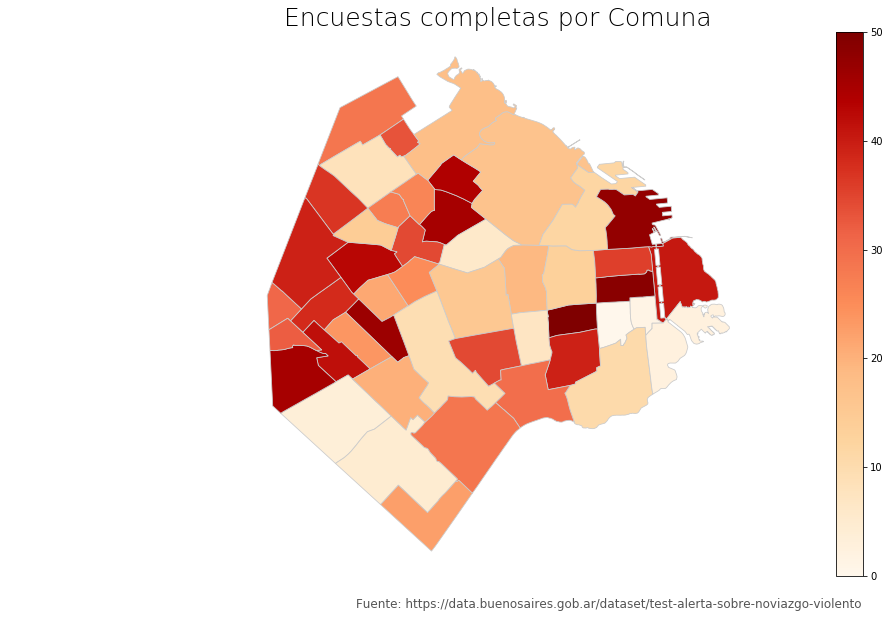

In [37]:
# set the value column that will be visualised
variable = 'barrio_completo'# set the range for the choropleth values
vmin, vmax = 0, 50# create figure and axes for Matplotlib
fig, ax = plt.subplots(figsize=(30, 10))# remove the axis
ax.axis('off')


# create figure and axes for Matplotlib
#fig, ax = plt.subplots(figsize=(10, 5))# remove the axis
ax.axis('off')# add a title and annotation
ax.set_title('Encuestas completas por Comuna', fontdict={'fontsize': '25', 'fontweight' : '5'})
ax.annotate('Fuente: https://data.buenosaires.gob.ar/dataset/test-alerta-sobre-noviazgo-violento', xy=(0.4, .05), xycoords='figure fraction', fontsize=12, color='#555555')# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap= "OrRd" , norm=plt.Normalize(vmin=vmin, vmax=vmax))# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it# add the colorbar to the figure
fig.colorbar(sm)# create map
vecescompletadaporbarrio.plot(column="barrio_completo", cmap= "OrRd" , linewidth=0.8, ax=ax, edgecolor='0.8')
fig.savefig("encuestascompletasporcomuna.png", dpi=300)

### Probamos de armar uno por edad

In [75]:
df = pd.read_csv("dataset_joined.csv")
df.head(5)

,Unnamed: 0,fecha,hora,edad,genero,barrio,pregunta_1,pregunta_2,pregunta_3,pregunta_4,...,pregunta_6,pregunta_7,pregunta_8,pregunta_9,pregunta_10,pregunta_11,pregunta_12,pregunta_13,barrio_completo,poblacion_por_barrio
0,0,2019-06-14,09:09:00,27,Mujer,Constitucion,A,A,A,B,...,B,C,C,B,C,B,C,C,Constitucion,44107
1,1,2019-06-13,23:20:00,17,Mujer,Otro,A,B,B,B,...,C,C,B,B,C,B,C,C,Coghlan,18604
2,2,2019-06-13,16:33:00,15,Mujer,Recoleta,B,B,C,B,...,B,B,A,A,A,A,A,A,Recoleta,157932
3,3,2019-06-13,16:10:00,20,Mujer,Barracas,B,C,C,C,...,C,C,C,C,C,B,C,C,Barracas,89452
4,4,2019-06-13,14:29:00,39,Hombre,Almagro,B,C,B,B,...,C,B,C,B,C,C,B,C,Almagro,131699


In [88]:
df_r = df[["edad", "genero", "barrio", "hora"]]
df_r[["barrio"]] = df_r[["barrio"]].apply(lambda x: x.astype(str).str.upper())

In [89]:
df_rr = gpd.read_file("dfencuestadosporbarrio.csv").drop(columns = ["geometry"])
porbarrios = porbarrios.apply(lambda x: x.astype(str).str.upper())
porbarrios.rename(columns = {'index':'BARRIO'}, inplace = True) 
porbarrios.dtypes

BARRIO             object
barrio_completo    object
dtype: object

In [115]:
gruposdeedad = pd.cut(df_r["edad"], bins = (15,30,45,60))
#pd.cut(df['Age'], bins=[19, 40, 65, np.inf])